<a href="https://colab.research.google.com/github/PinskayaNika/MMO_Pinskaya/blob/main/RK1_Pinskaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Рубежный контроль №1**
**Студент:** Сергеев М.К.  
**Группа:** ИУ5-22М   
**Вариант:** 9  
**Задачи:** 9, 29  
**Доп. требование:** график "Диаграмма рассяния"

## Импорт библиотек

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Загрузка и просмотр датасета

Датасет содержит данные о географии ковида. Для анализа географии используются 6 числовых показателей: общий процент риска, высокий риск на койку отделения интенсивной терапии, высокий риск для больницы, койки отделения интенсивной терапии, больницы, общий риск.

In [83]:
df = pd.read_csv('/content/drive/MyDrive/MMO/mmsa-icu-beds2.csv')

In [84]:
df.shape

(136, 8)

In [85]:
df

,MMSA,code,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk
0,San Juan-Carolina-Caguas,PR,52.88%,NaN,NaN,NaN,NaN,923725.203
1,Manhattan,KS,47.29%,4489.848750,8979.69750,8.0,4.0,35918.790
2,Hilton Head Island-Bluffton-Beaufort,SC,62.72%,3904.163571,36438.86000,28.0,3.0,109316.580
3,Kahului-Wailuku-Lahaina,HI,59.13%,3860.557000,19302.78500,20.0,4.0,77211.140
4,Spartanburg,SC,66.12%,3786.115556,85187.60000,45.0,2.0,170375.200
...,...,...,...,...,...,...,...,...
131,Charleston,WV,75.97%,831.689744,25948.72000,156.0,5.0,129743.600
132,Duluth,MN-WI,60.34%,730.523135,12286.07091,185.0,11.0,135146.780
133,Reno,NV,57.86%,638.824743,42290.19800,331.0,5.0,211450.990
134,Gainesville,FL,56.38%,621.449952,65252.24500,210.0,2.0,130504.490


In [86]:
df.head()

,MMSA,code,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk
0,San Juan-Carolina-Caguas,PR,52.88%,NaN,NaN,NaN,NaN,923725.203
1,Manhattan,KS,47.29%,4489.848750,8979.6975,8.0,4.0,35918.790
2,Hilton Head Island-Bluffton-Beaufort,SC,62.72%,3904.163571,36438.8600,28.0,3.0,109316.580
3,Kahului-Wailuku-Lahaina,HI,59.13%,3860.557000,19302.7850,20.0,4.0,77211.140
4,Spartanburg,SC,66.12%,3786.115556,85187.6000,45.0,2.0,170375.200


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSA                    136 non-null    object 
 1   code                    119 non-null    object 
 2   total_percent_at_risk   119 non-null    object 
 3   high_risk_per_ICU_bed   118 non-null    float64
 4   high_risk_per_hospital  118 non-null    float64
 5   icu_beds                118 non-null    float64
 6   hospitals               118 non-null    float64
 7   total_at_risk           119 non-null    float64
dtypes: float64(5), object(3)
memory usage: 8.6+ KB


## 1. Задача 9
Для набора данных провести устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения "хвостом распределения".

In [88]:
# Количество пропусков
[(i, df[i].isnull().sum()) for i in df.columns]

[('MMSA', 0),
 ('code', 17),
 ('total_percent_at_risk', 17),
 ('high_risk_per_ICU_bed', 18),
 ('high_risk_per_hospital', 18),
 ('icu_beds', 18),
 ('hospitals', 18),
 ('total_at_risk', 17)]

In [90]:
# Похоже на нормальное
total_at_risk_ev = df['total_at_risk'].mean() + 3*df['total_at_risk'].std()
total_at_risk_ev

2871737.49159299

In [95]:
# Ассиметричное
IQR = df['icu_beds'].quantile(0.75) - df['icu_beds'].quantile(0.25)
icu_beds_ev1 = df['icu_beds'].quantile(0.75) + 3*IQR
print('IQR={}, extreme_value={}'.format(IQR, icu_beds_ev1))

icu_beds_ev1

IQR=314.0, extreme_value=1342.0


1342.0

In [96]:
icu_beds_ev2 = df['icu_beds'].quantile(0.75) + 1.5*IQR
print('IQR={}, extreme_value={}'.format(IQR, icu_beds_ev2))

IQR=314.0, extreme_value=871.0


In [97]:
IQR_lf = df['icu_beds'].quantile(0.75) - df['icu_beds'].quantile(0.25)
icu_beds_ev1 = df['icu_beds'].quantile(0.75) + 1.5*IQR_lf
icu_beds_ev2 = df['icu_beds'].quantile(0.75) + 3*IQR_lf

In [98]:
df['icu_beds'].fillna(icu_beds_ev1, inplace=True)

In [99]:
df['total_at_risk'].fillna(total_at_risk_ev, inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSA                    136 non-null    object 
 1   code                    119 non-null    object 
 2   total_percent_at_risk   119 non-null    object 
 3   high_risk_per_ICU_bed   118 non-null    float64
 4   high_risk_per_hospital  118 non-null    float64
 5   icu_beds                136 non-null    float64
 6   hospitals               118 non-null    float64
 7   total_at_risk           136 non-null    float64
dtypes: float64(5), object(3)
memory usage: 8.6+ KB


Из результатов видно, что пропуски в колонках icu_beds и total_at_risk были устранены.

## 2. Задача 29
Для набора данных провести удаление константных и псевдоконстантных признаков.

In [154]:
df2 = pd.read_csv('/content/drive/MyDrive/MMO/mmsa-icu-beds3.csv')

In [155]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSA                    136 non-null    object 
 1   code                    119 non-null    object 
 2   total_percent_at_risk   119 non-null    object 
 3   high_risk_per_ICU_bed   115 non-null    float64
 4   high_risk_per_hospital  115 non-null    float64
 5   icu_beds                116 non-null    float64
 6   hospitals               118 non-null    float64
 7   total_at_risk           119 non-null    float64
 8   miss_feature            5 non-null      float64
 9   const_feature           113 non-null    float64
dtypes: float64(7), object(3)
memory usage: 10.8+ KB


In [156]:
# Доля (процент) пропусков
dfNanRate = pd.DataFrame([(c, df2[c].isnull().mean()) for c in df2], columns=['Feature', 'NaNRate'])
dfNanRate.sort_values(by='NaNRate', ascending=False)

,Feature,NaNRate
8,miss_feature,0.963235
9,const_feature,0.169118
3,high_risk_per_ICU_bed,0.154412
4,high_risk_per_hospital,0.154412
5,icu_beds,0.147059
6,hospitals,0.132353
1,code,0.125000
2,total_percent_at_risk,0.125000
7,total_at_risk,0.125000
0,MMSA,0.000000


In [157]:
dfNanRate[dfNanRate.NaNRate > 0.95]

,Feature,NaNRate
8,miss_feature,0.963235


In [158]:
null_features = list(dfNanRate[dfNanRate.NaNRate > 0.95].Feature)
null_features

['miss_feature']

Удалим признаки, у которых слишком большой процент пропусков (>95%), т.е. они являются псевдоконстантными.

In [159]:
df2.drop(null_features, axis=1, inplace=True)

In [160]:
for feat in null_features:
    if feat not in df2:
        print(feat, 'удален')

miss_feature удален


Признаки удалены.

In [161]:
print("У этих признаков большая доля одного значения:")
pseudoconstant_feats = []
for col in df2.columns:
    if list(df2[col].value_counts(normalize=True))[0] > 0.95:
        pseudoconstant_feats.append(col)
pseudoconstant_feats

У этих признаков большая доля одного значения:


['const_feature']

In [162]:
df2.drop(pseudoconstant_feats, axis=1, inplace=True)

In [163]:
for feat in pseudoconstant_feats:
    if feat not in df2:
        print(feat, 'удален')

const_feature удален


## Дополнительное задание
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

In [102]:
df_dop = pd.read_csv('/content/drive/MyDrive/MMO/mmsa-icu-beds2.csv')

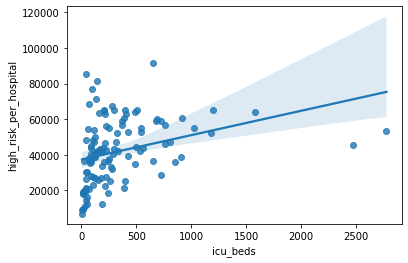

In [107]:
sns.regplot(x=df_dop['icu_beds'], y=df_dop['high_risk_per_hospital'])

Построили график рассеяния, показывающий зависимость между двумя признаками: icu beds (кровати отделения интенсивной терапии) и high_risk_per_hospital (высокий риск для больницы).